
#Task:Transfer Learning

We will implement different strategies on doing transfer learning.
1. Same distribution \
For this, I have split the MNIST dataset such that 7 classes are the source domain and the other 3 classes are the target domain.\
Below are the steps followed: 
- Start with the source domain data set and train a model on it.
- From the trained model, cut off the final classification layer and replace it with a new layer for the target domain classes. For now, keep all layers trainable.
- Now train this model on the target domain data set. For comparison, also train a freshly initialized model on the target domain data set.
- Lastly, I have compared : the achieved accuracy, steps until convergence and generalisation

2. different distribution\
Now we will work with MNIST as source domain and FMNIST as target domain. \
- first train a model on the MNIST and use the pre-trained model as initialization for a model trained on FMNIST.
-Compare this transfer learned model with a model trained on FMNIST from scratch 

3. Other ways

#Task 3:  Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Input, BatchNormalization, Dropout
from keras import Model
import matplotlib.pyplot as plt


In [ ]:
def load_dataset():
  mnist = tf.keras.datasets.mnist
  (trainX , trainY) , (testX, testY) = mnist.load_data()
  print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
  print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # trainY = to_categorical(trainY)
  # testY = to_categorical(testY)
  return trainX, trainY, testX, testY


In [ ]:
def prepare_pixel(train , test):
  train =  train.astype('float32')
  test = test.astype('float32')
  train , test = train/255 , test/255
  return train , test

In [ ]:
def my_model():
  inp = Input((30,30,1))
  x = Conv2D(64,(3,3),activation='relu',padding='same')(inp)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2,2), padding='same')(x)
  x = Flatten()(x)
  x = Dense(24,activation='relu',)(x)
  out = Dense(100, activation='softmax')(x)  #Cut off layer
  # out = Dense(64, activation='softmax')(x)
  model = Model(inp,out)
  opt = tf.optimizers.Adam()
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True , name='loss')
  train_acc_metric = tf.metrics.SparseCategoricalAccuracy(name ='acc')
  model.compile( loss=loss_fn, metrics=[train_acc_metric])
  return model

In [ ]:
def filter_data(x , y ,  data_mode):
  if(data_mode == 'source'):
    r = (y >= 0) & (y<=6)
    x,y = x[r],y[r]
  else:
    r = (y>=7) & (y<=9)
    x,y = x[r],y[r]
  return x,y

In [ ]:
def get_data(trainX, trainY, testX, testY, data_mode):
  trainX, trainY = filter_data(trainX, trainY, data_mode)
  testX, testY = filter_data( testX, testY , data_mode)
  return trainX, trainY, testX, testY

In [ ]:
def plot_accuracy(history):
  acc_train = history.history['acc']
  acc_val = history.history['val_acc']
  epochs = range(1,4)
  plt.plot(epochs, acc_train, 'g', label='Training accuracy')
  plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
  plt.ylim(0,1)
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  return

## 3.1 Same Distribution

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
18065 41935 3011 6989
Epoch 1/3
300/300 [==============================] - 42s 139ms/step - loss: 2.6266 - acc: 0.8940 - val_loss: 2.7768 - val_acc: 0.9814
Epoch 2/3
300/300 [==============================] - 42s 140ms/step - loss: 2.5322 - acc: 0.9870 - val_loss: 2.5322 - val_acc: 0.9881
Epoch 3/3
300/300 [==============================] - 42s 140ms/step - loss: 2.5277 - acc: 0.9908 - val_loss: 2.5300 - val_acc: 0.9886


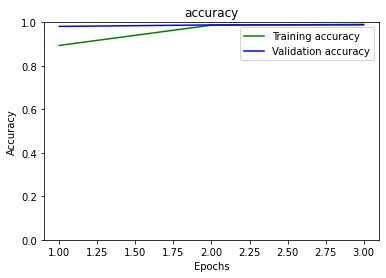

In [ ]:

trainX, trainY, testX, testY = load_dataset()
trainX , testX = prepare_pixel(trainX,testX)
s_trainX, s_trainY , s_testX , s_testY = get_data(trainX, trainY, testX, testY , 'source')
t_trainX, t_trainY , t_testX , t_testY = get_data(trainX, trainY, testX, testY , 'target')
print(len(t_trainY),len(s_trainY), len(t_testY), len(s_testY))
model = my_model()
history = model.fit(x = s_trainX,y= s_trainY,steps_per_epoch=300, epochs = 3 , validation_data =(s_testX,s_testY))
plot_accuracy(history)


Epoch 1/3
300/300 [==============================] - 19s 64ms/step - loss: 2.8795 - acc: 0.6384 - val_loss: 2.5381 - val_acc: 0.9804
Epoch 2/3
300/300 [==============================] - 19s 63ms/step - loss: 2.5313 - acc: 0.9879 - val_loss: 2.5307 - val_acc: 0.9880
Epoch 3/3
291/300 [============================>.] - 18s 63ms/step - loss: 2.5262 - acc: 0.9924 - val_loss: 2.5317 - val_acc: 0.9861


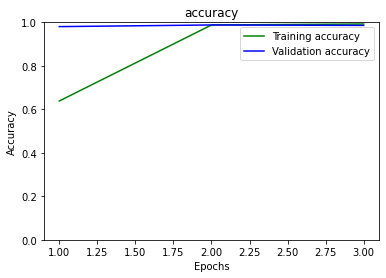

In [ ]:
#Model trained on source domain and then trained on target domain
history = model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)

Epoch 1/3
300/300 [==============================] - 19s 63ms/step - loss: 2.6497 - acc: 0.8687 - val_loss: 2.6585 - val_acc: 0.9631
Epoch 2/3
300/300 [==============================] - 19s 63ms/step - loss: 2.5360 - acc: 0.9828 - val_loss: 2.5372 - val_acc: 0.9814
Epoch 3/3
291/300 [============================>.] - 19s 64ms/step - loss: 2.5300 - acc: 0.9879 - val_loss: 2.5413 - val_acc: 0.9784


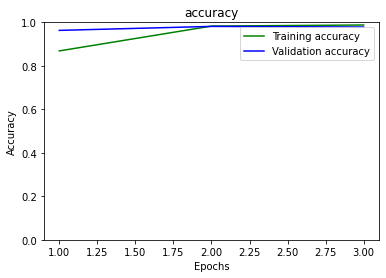

In [ ]:
# Freshly initialised model trained on target domain
new_model = my_model()
history = new_model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)

##Observations
1. In terms of achieved accuracy, the transfer learned model had a better accuracy than the simple model
2. The transfer learning model converged at the second epoch while the second model converged earlier
3. Overall the error of the transfer learned model was less as compared to the simple model

Overall the transfer learned model performed better


##3.2 Different distribution

### Source:MNIST    Target: FMNIST

In [ ]:
#Setting the source and target domain
mnist = tf.keras.datasets.mnist
fmnist = tf.keras.datasets.fashion_mnist
(s_trainX, s_trainY),(s_testX, s_testY)  = mnist.load_data()
(t_trainX, t_trainY), (t_testX, t_testY) = fmnist.load_data()
s_trainX, s_testX = prepare_pixel(s_trainX, s_testX)
t_trainX, t_testX = prepare_pixel(t_trainX, t_testX)
print(len(t_trainY),len(s_trainY), len(t_testY), len(s_testY))


4423680/4422102 [==============================] - 0s 0us/step
60000 60000 10000 10000


Epoch 1/3
300/300 [==============================] - 59s 198ms/step - loss: 2.7685 - acc: 0.7526 - val_loss: 2.9339 - val_acc: 0.7801
Epoch 2/3
300/300 [==============================] - 59s 196ms/step - loss: 2.7328 - acc: 0.7846 - val_loss: 2.7313 - val_acc: 0.7866
Epoch 3/3
300/300 [==============================] - 59s 197ms/step - loss: 2.6378 - acc: 0.8804 - val_loss: 2.6318 - val_acc: 0.8860


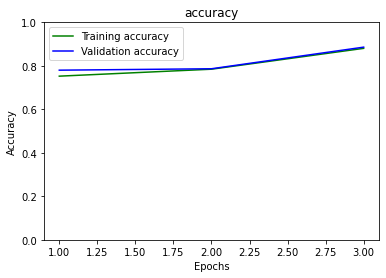

In [ ]:
model = my_model()
history = model.fit(x = s_trainX,y= s_trainY,steps_per_epoch=300, epochs = 3 , validation_data =(s_testX,s_testY))
plot_accuracy(history)

Epoch 1/3
300/300 [==============================] - 56s 185ms/step - loss: 3.1154 - acc: 0.4024 - val_loss: 3.0644 - val_acc: 0.4529
Epoch 2/3
300/300 [==============================] - 56s 186ms/step - loss: 3.0558 - acc: 0.4620 - val_loss: 3.0595 - val_acc: 0.4579
Epoch 3/3
300/300 [==============================] - 55s 184ms/step - loss: 3.0503 - acc: 0.4672 - val_loss: 3.0536 - val_acc: 0.4641


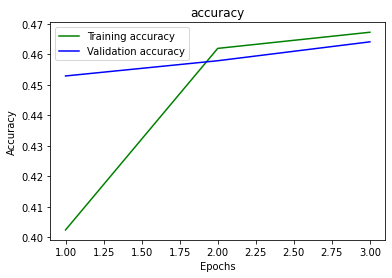

In [ ]:
#Model trained on source domain and then trained on target domain
history = model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)

In [ ]:
new_model = my_model()

Epoch 1/3
300/300 [==============================] - 57s 189ms/step - loss: 2.7975 - acc: 0.7229 - val_loss: 2.8615 - val_acc: 0.7491
Epoch 2/3
300/300 [==============================] - 57s 190ms/step - loss: 2.7329 - acc: 0.7857 - val_loss: 2.7011 - val_acc: 0.8185
Epoch 3/3
300/300 [==============================] - 61s 202ms/step - loss: 2.6800 - acc: 0.8383 - val_loss: 2.6830 - val_acc: 0.8358


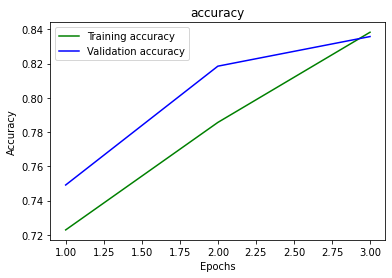

In [ ]:
history = new_model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)


1. In terms of accuracy the simple model had a better accuracy.
2. The simple model had a better accuracy because the target domain was FMNIST which is a complex dataset than MNIST.

###Source: FMNIST Target:MNIST

In [ ]:
#Setting the source and target domain
mnist = tf.keras.datasets.mnist
fmnist = tf.keras.datasets.fashion_mnist
(s_trainX, s_trainY),(s_testX, s_testY)  = fmnist.load_data()
(t_trainX, t_trainY), (t_testX, t_testY) = mnist.load_data()
s_trainX, s_testX = prepare_pixel(s_trainX, s_testX)
t_trainX, t_testX = prepare_pixel(t_trainX, t_testX)
print(len(t_trainY),len(s_trainY), len(t_testY), len(s_testY))


60000 60000 10000 10000


Epoch 1/3
300/300 [==============================] - 57s 190ms/step - loss: 2.8271 - acc: 0.6932 - val_loss: 2.9214 - val_acc: 0.7179
Epoch 2/3
300/300 [==============================] - 56s 188ms/step - loss: 2.7101 - acc: 0.8089 - val_loss: 2.7121 - val_acc: 0.8075
Epoch 3/3
300/300 [==============================] - 57s 189ms/step - loss: 2.6940 - acc: 0.8244 - val_loss: 2.7078 - val_acc: 0.8109


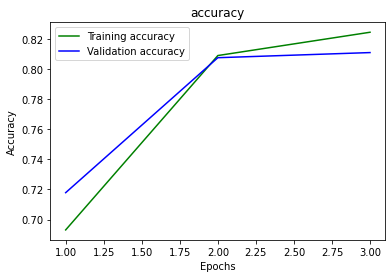

In [ ]:
model = my_model()
history = model.fit(x = s_trainX,y= s_trainY,steps_per_epoch=300, epochs = 3 , validation_data =(s_testX,s_testY))
plot_accuracy(history)

Epoch 1/3
300/300 [==============================] - 54s 181ms/step - loss: 2.9231 - acc: 0.5944 - val_loss: 2.8390 - val_acc: 0.6781
Epoch 2/3
300/300 [==============================] - 55s 182ms/step - loss: 2.8345 - acc: 0.6829 - val_loss: 2.8312 - val_acc: 0.6865
Epoch 3/3
300/300 [==============================] - 54s 180ms/step - loss: 2.7960 - acc: 0.7217 - val_loss: 2.7354 - val_acc: 0.7827


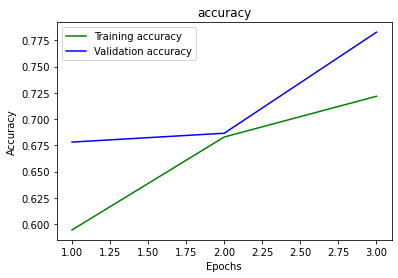

In [ ]:
history = model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)

In [ ]:
new_model = my_model()

Epoch 1/3
300/300 [==============================] - 55s 183ms/step - loss: 2.9513 - acc: 0.5685 - val_loss: 3.0857 - val_acc: 0.5508
Epoch 2/3
300/300 [==============================] - 59s 198ms/step - loss: 2.9253 - acc: 0.5918 - val_loss: 2.9278 - val_acc: 0.5906
Epoch 3/3
300/300 [==============================] - 55s 183ms/step - loss: 2.7854 - acc: 0.7326 - val_loss: 2.7314 - val_acc: 0.7859


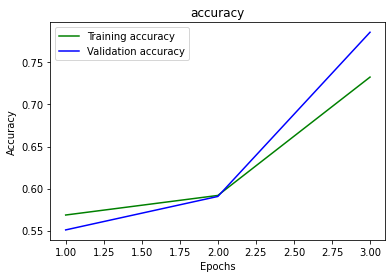

In [ ]:
history = new_model.fit(x = t_trainX , y = t_trainY ,steps_per_epoch=300, epochs = 3 , validation_data =(t_testX,t_testY) )
plot_accuracy(history)

##Observation:
Transfer learning using different distribution gave us a better accuracy when the source model was FMNIST  and target was MNIST due to the complexity of the datasets.

Both the models converged at second epoch\

The generalisation was better for the second approach again due to the complexity of the datasets.




##3.3 Comparing different ways to do transfer learning

###Freezing bottom layers

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
Epoch 1/3
300/300 [==============================] - 56s 186ms/step - loss: 2.9376 - acc: 0.5808 - val_loss: 2.9952 - val_acc: 0.5878
Epoch 2/3
300/300 [==============================] - 55s 184ms/step - loss: 2.8704 - acc: 0.6474 - val_loss: 2.8322 - val_acc: 0.6864
Epoch 3/3
300/300 [==============================] - 55s 182ms/step - loss: 2.8210 - acc: 0.6964 - val_loss: 2.8255 - val_acc: 0.6915


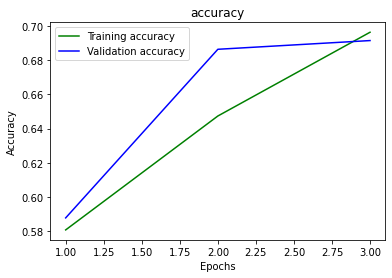

In [ ]:
trainX, trainY, testX, testY = load_dataset()
trainX , testX = prepare_pixel(trainX,testX)

model = my_model()
history = model.fit(x = trainX,y= trainY,steps_per_epoch=300, epochs = 3 , validation_data =(testX,testY))
plot_accuracy(history)

###Freezing pre-trained layers

Epoch 1/3
300/300 [==============================] - 55s 182ms/step - loss: 2.8109 - acc: 0.7064 - val_loss: 2.7417 - val_acc: 0.7766
Epoch 2/3
300/300 [==============================] - 54s 182ms/step - loss: 2.7274 - acc: 0.7907 - val_loss: 2.7306 - val_acc: 0.7867
Epoch 3/3
300/300 [==============================] - 54s 181ms/step - loss: 2.7219 - acc: 0.7955 - val_loss: 2.7291 - val_acc: 0.7882


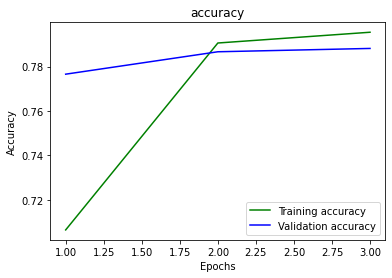

In [ ]:
model.trainable = False
history = model.fit(x = trainX,y= trainY,steps_per_epoch=300, epochs = 3 , validation_data =(testX,testY))
plot_accuracy(history)

The generalisation error for the second approach was very poor.